### Importing libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Shape of Dataset

In [3]:
df.shape

(200, 4)

### Information of Dataset like Columns, null count and Data type.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Statistical details of individual columns

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Visualisation of relation between independent variable and dependent variable

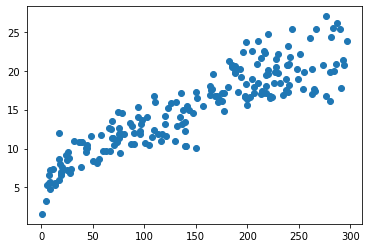

In [6]:
plt.scatter(df.TV, df.Sales)
plt.show()

### regression plot for easy visualisation of relationship

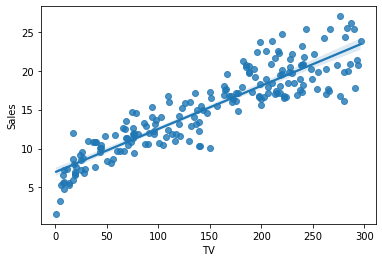

In [7]:
sns.regplot(x = 'TV', y = 'Sales', data = df)
plt.show()

### Histogram plot for frequency distribution

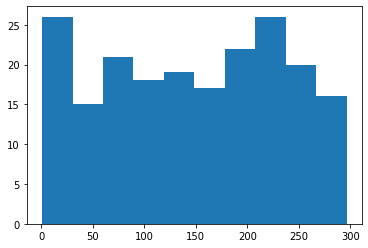

In [8]:
plt.hist(df.TV)
plt.show()

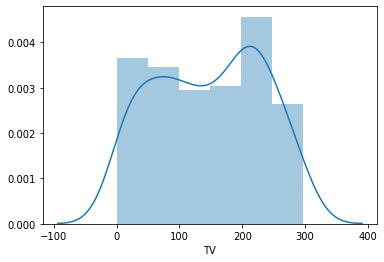

In [9]:
# Density distribution plot
sns.distplot(df.TV)
plt.show()

### Independent variable - X and dependent variable - Y

In [10]:
X = df['TV']
y = df['Sales']

In [11]:
print(X.shape)
print(y.shape)

(200,)
(200,)


### Dimension check

In [12]:
X.ndim

1

### Splitting of Dataset into Train and Test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

### Dimension check

In [15]:
X_train.ndim

1

## Linear Regression by using statsmodels library

In [16]:
import statsmodels.api as sm

In [17]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [18]:
reg = sm.OLS(y_train, X_train_sm).fit()

In [19]:
reg.params

const    6.948683
TV       0.054546
dtype: float64

In [20]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           1.52e-52
Time:                        12:10:24   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

### R squared

In [21]:
reg.rsquared

0.8157933136480389

In [22]:
reg.rsquared_adj

0.8144584825875174

In [23]:
reg.pvalues

const    3.456118e-38
TV       1.516345e-52
dtype: float64

In [24]:
reg.params

const    6.948683
TV       0.054546
dtype: float64

### Predicting dependent variable for Training set and Testing set

In [25]:
y_train_pred = reg.predict(X_train_sm)
y_test_pred = reg.predict(X_test_sm)

### Visualisation of fitting for the dataset

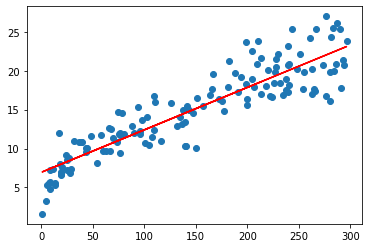

In [26]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

### Predicting new variable within the range of X

In [27]:
reg.predict([1,100])

array([12.40325849])

In [28]:
reg.predict([1,250])

array([20.58512143])

### Residual analysis

In [29]:
res = y_train - y_train_pred

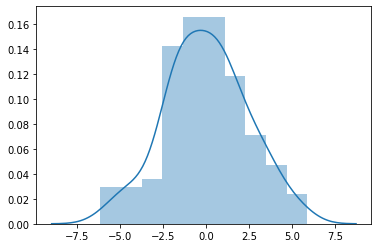

In [30]:
sns.distplot(res)

#### Looking like normally distributed curve and mean is 0.

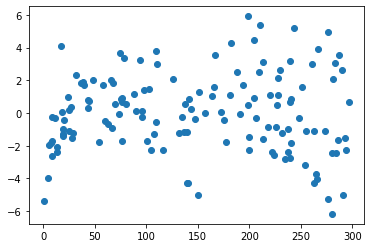

In [31]:
plt.scatter(X_train, res)
plt.show()

#### Variance is distributed equally on both the above and below half from 0.